# Exploratory data analysis (EDA):

EDA is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better. In this article, we will understand EDA with the help of an example dataset.

# Introduction 

#  Importing the libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#  Importing the data

In [3]:
#read csv file
df = pd.read_csv("indian-state-level-election.csv")

In [4]:
# print frist five row
df.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [4]:
# print last five rows
df.tail()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
327289,West Bengal,2011.0,294,Murarai,GEN,Ajrail Md,M,IND,IND,2471.0,189320
327290,West Bengal,2011.0,294,Murarai,GEN,Shiblal Sardar,M,BSP,BSP,3074.0,189320
327291,West Bengal,2011.0,294,Murarai,GEN,Sudhiranjan Das Goswami,M,BJP,BJP,4961.0,189320
327292,West Bengal,2011.0,294,Murarai,GEN,Elahi Kamre Dr,M,CPM,CPM,73414.0,189320
327293,West Bengal,2011.0,294,Murarai,GEN,Nure Alam Chowdhury,M,AITC,AITC,77817.0,189320


In [5]:
#check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  object 
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     311211 non-null  object 
 4   ac_type     327294 non-null  object 
 5   cand_name   327294 non-null  object 
 6   cand_sex    321992 non-null  object 
 7   partyname   327294 non-null  object 
 8   partyabbre  324588 non-null  object 
 9   totvotpoll  327287 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


In [6]:
# checking  statistical data like percentile, mean and std of the numerical values of datasets
df.describe()

,year,ac_no,totvotpoll,electors
count,327294.000000,327294.000000,327287.000000,3.272940e+05
mean,1996.143765,127.910918,9299.673421,1.684289e+05
std,10.993383,96.626260,17025.780928,8.316493e+04
min,1977.000000,1.000000,0.000000,0.000000e+00
25%,1989.000000,49.000000,289.000000,1.186640e+05
50%,1995.000000,106.000000,1022.000000,1.578260e+05
75%,2006.000000,193.000000,9182.000000,2.010310e+05
max,2015.000000,425.000000,584098.000000,1.593907e+06


In [7]:
#shape of the dataset
# it will print how many rows and columns are there in dataset
df.shape

(327294, 11)

In [8]:
#print columns name
df.columns

Index(['st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [9]:
#Check how many different "states" and  types are there.
df['st_name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'National Capital Territory Of Delhi', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Data cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

#  Missing value Inspection

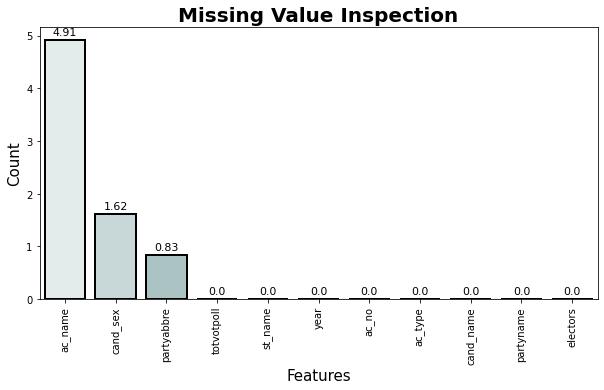

In [10]:
# Missing value Inspection

Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

'ac_name'(4.91%), 'cand_sex'(1.62%), 'partyabbre'(0.83%),  are features with missing values.

In [11]:
df.isnull()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
327289,False,False,False,False,False,False,False,False,False,False,False
327290,False,False,False,False,False,False,False,False,False,False,False
327291,False,False,False,False,False,False,False,False,False,False,False
327292,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         0
cand_sex       5302
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64

Finding the null values is the most important step in the EDA. we have some null values in the ‘ac_name’,'cand_sex' and ‘partyabbre’ variables.

# Replace the Null values

In [13]:
df['ac_name'] = df['ac_name'].fillna(0)

In [14]:
df['partyabbre'] = df['partyabbre'].fillna(0)

In [15]:
df['totvotpoll'] = df['totvotpoll'].fillna(0)

they are very less in number in comapre to data so we can replace them.

In [16]:
df.isnull().sum()

st_name          0
year             0
ac_no            0
ac_name          0
ac_type          0
cand_name        0
cand_sex      5302
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

In [17]:
df['cand_sex'].unique()

array(['M', 'F', nan, 'O'], dtype=object)

In [18]:
df.cand_sex.value_counts()

M    307098
F     14883
O        11
Name: cand_sex, dtype: int64

In [19]:
cand_sexX = df.cand_sex.mode()[0]

In [20]:
print(cand_sexX)

M


In [21]:
df.cand_sex.fillna(cand_sexX,inplace=True)

In [22]:
df.isnull().sum()

st_name       0
year          0
ac_no         0
ac_name       0
ac_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64

# Univariate analysis

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable. Since it’s a single variable it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

# What are the top 5 parties that got most votes in Uttar Pradesh?

In [33]:
data_2012 = df[df['year'] == 2012]
up_data_2012 = data_2012[data_2012['st_name'] =='Uttar Pradesh']
up_data_2012_max_voted_party = up_data_2012.groupby('partyabbre')['totvotpoll'].sum()
up_data_2012_max_voted_party = pd.DataFrame(up_data_2012_max_voted_party)
up_data_2012_max_voted_party = up_data_2012_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
up_data_2012_top5_max_voted_party = up_data_2012_max_voted_party.head(5)
up_data_2012_top5_max_voted_party = up_data_2012_top5_max_voted_party.reset_index()
up_data_2012_top5_max_voted_party 

,partyabbre,totvotpoll
0,SP,22090571.0
1,BSP,19647303.0
2,BJP,11371080.0
3,INC,8832895.0
4,IND,3134336.0


<BarContainer object of 5 artists>

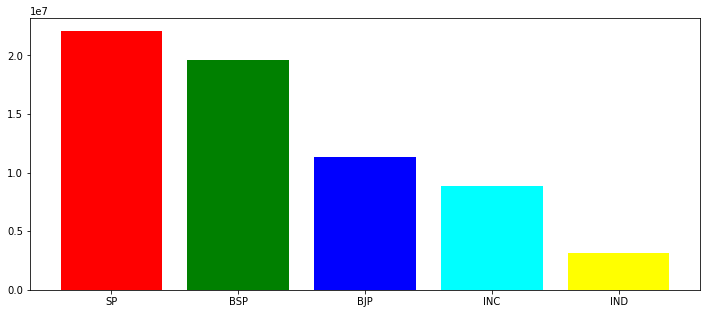

In [34]:
plt.figure(figsize = (12,5))
plt.bar(up_data_2012_top5_max_voted_party['partyabbre'],up_data_2012_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])

### conclusion

samajwadi party has got the higest no of votes in year 2012 in uttar pradesh.

# What are the top 5 parties that got most votes in Maharastra ?

In [31]:
data_2014 = df[df['year'] == 2014]
mh_data_2014 = data_2014[data_2014['st_name'] =='Maharashtra']
mh_data_2014_max_voted_party = mh_data_2014.groupby('partyabbre')['totvotpoll'].sum()
mh_data_2014_max_voted_party = pd.DataFrame(mh_data_2014_max_voted_party)
mh_data_2014_max_voted_party = mh_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
mh_data_2014_top5_max_voted_party = mh_data_2014_max_voted_party.head(5)
mh_data_2014_top5_max_voted_party 

,totvotpoll
partyabbre,
BJP,14709276.0
SHS,10235970.0
INC,9496095.0
NCP,9122285.0
IND,2493152.0


### conclusion 

BJP has got the higest no of votes in year 2014 in Maharashtra .

In [36]:
#Numeric feature
df.describe()

,year,ac_no,totvotpoll,electors
count,327294.000000,327294.000000,327294.000000,3.272940e+05
mean,1996.143765,127.910918,9299.474524,1.684289e+05
std,10.993383,96.626260,17025.653176,8.316493e+04
min,1977.000000,1.000000,0.000000,0.000000e+00
25%,1989.000000,49.000000,289.000000,1.186640e+05
50%,1995.000000,106.000000,1022.000000,1.578260e+05
75%,2006.000000,193.000000,9182.000000,2.010310e+05
max,2015.000000,425.000000,584098.000000,1.593907e+06


### Histogram

Minimum totvotpoll: 0.0
Maximum totvotpoll: 584098.0


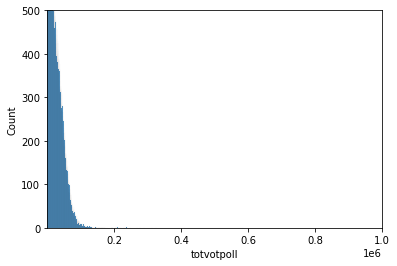

In [37]:

fig, ax = plt.subplots()
sns.histplot(x='totvotpoll', data=df)
print("Minimum totvotpoll:",df['totvotpoll'].min())
print("Maximum totvotpoll:",df['totvotpoll'].max())
ax.set_xlim(1000, 1000000)
ax.set_ylim(0, 500)

plt.show()

it is value distribution plot of totvotpoll which is numericl column. here we can see how value are distributed and where the maximum value lies.

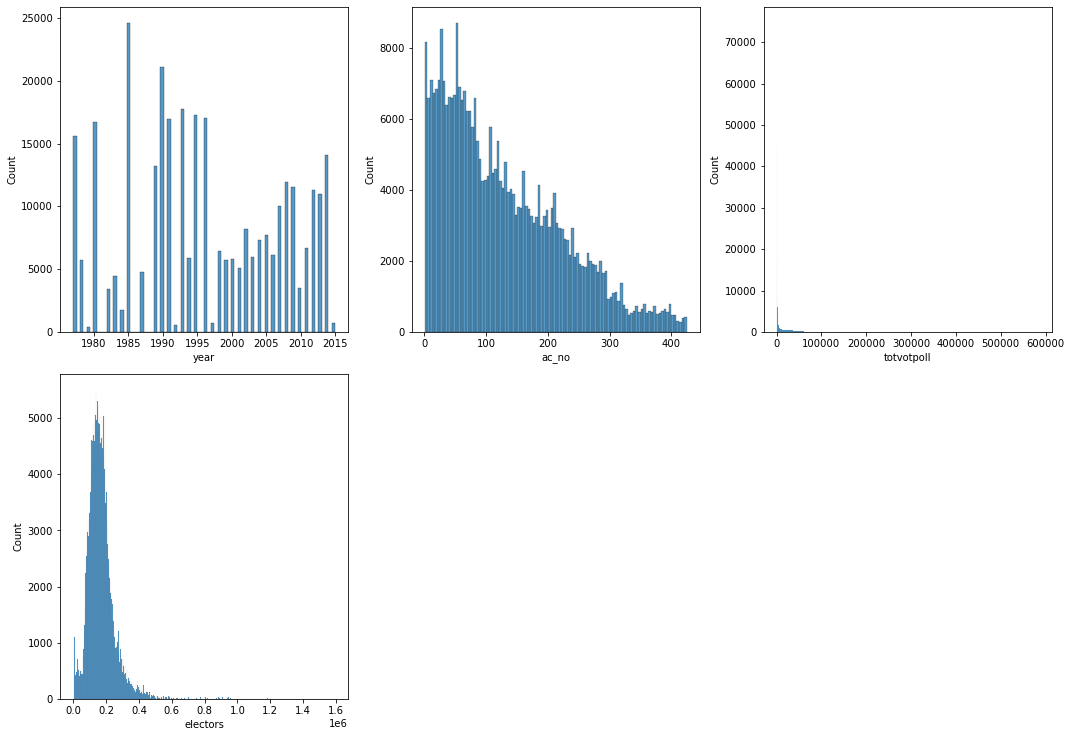

In [38]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

it is a value distribution plot of all numerical columns. It basically creates bins in various ranges in values and plots it where we can visualize how values are distributed. We can have a look where more values lie like in positive, negative, or at the center(mean). 

## Outliers 

An outlier is a point or set of data points that lie away from the rest of the data values of the dataset.. 
Outliers are easily identified by visualizing the data.
For e.g. 
In a boxplot, the data points which lie outside the upper and lower bound can be considered as outliers
In a scatterplot, the data points which lie outside the groups of datapoints can be considered as outliers


### Boxplot

<AxesSubplot:xlabel='year'>

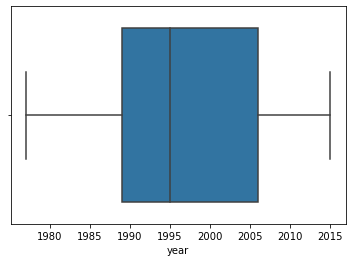

In [39]:
sns.boxplot(x=df['year'])

###  i create boxplots for all numeric  variables in a loop

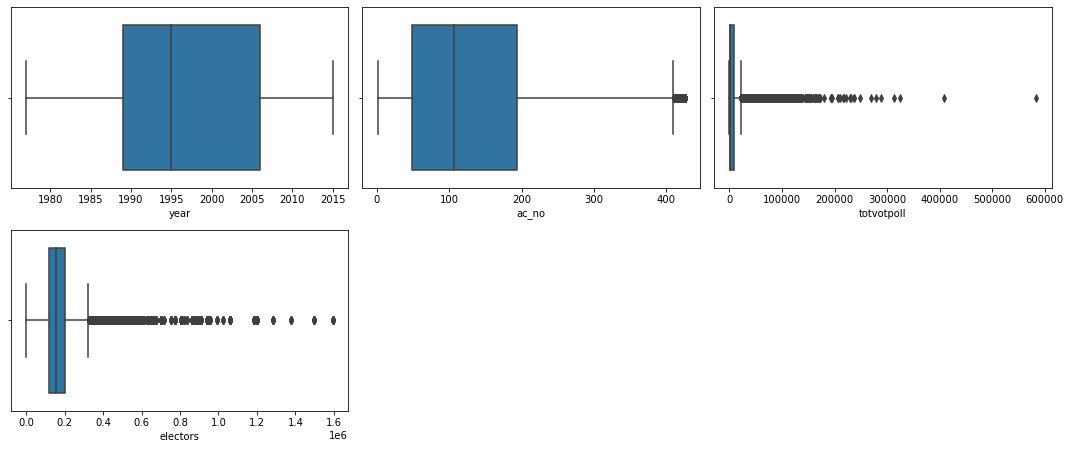

In [40]:
cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

we find the outlier and its values ,symmetry of data.

###  Outlier removal 

### VIOLINE PLOT

<AxesSubplot:xlabel='year'>

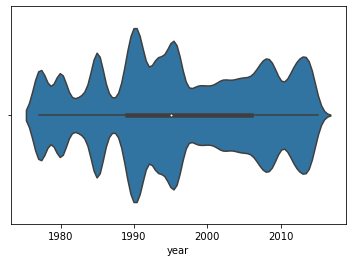

In [41]:
# 5. VIOLINE PLOT - box and kernel
sns.violinplot(x=df["year"])

 it is a hybrid of a box plot and a kernel density plot, which shows peaks in the year column. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

###  CATEGORICAL FEATURES

In [54]:
# CATEGORICAL FEATURES
df.describe(include='object')

count         3.000000
mean     109098.000000
std      176221.654455
min          11.000000
25%        7447.000000
50%       14883.000000
75%      163641.500000
max      312400.000000
Name: cand_sex, dtype: float64

### the code below use a loop to crate count plot for the categorical features

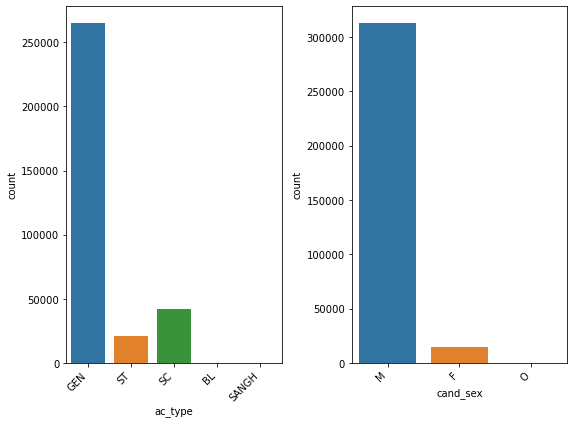

In [46]:
# 1. COUNT PLOT
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))
all_categs = df.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

it Show the counts of observations in each categorical bin using bars. the bar height showing number of times each class occurs in data.

####   we want to calculate additional information about percentage presence of each category in data means which category is getting how much weightage in data.

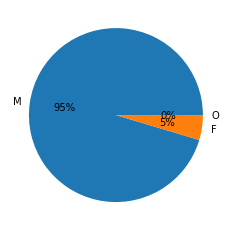

In [7]:
# 2. PIE CHART
d = df['cand_sex'].value_counts()
plt.pie(d, labels=d.index, autopct="%.0f%%");

we display the percentage distribution of cand_sex  catagorical variable in a circular graph.

### BIVARIATE ANALYSIS

### scatter plot

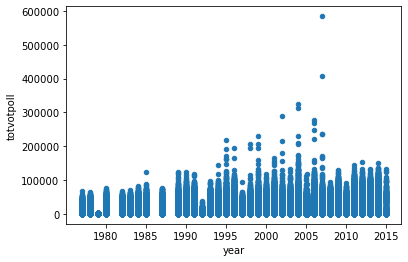

In [7]:
df.plot.scatter(x="year",y="totvotpoll")
plt.show()

Here we plot the grapn between two numeric feature and explain the change in one variable with respect to change in other variable . we use this plot beacause we etablish the relationship between two variable.
the above scatter plot clearly show two distnict clusture of diffrent column .on x-axis year colunm and on y-axis totvotpoll
and scatter plot show strong relationship between them.

<AxesSubplot:>

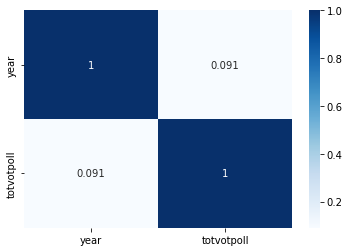

In [8]:
# Correlation Matrix
sns.heatmap(df[["year","totvotpoll"]].corr(), annot=True, cmap="Blues")

From here we can see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model.

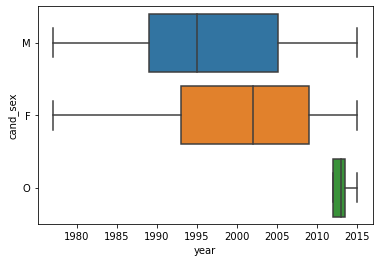

In [9]:
# CATEGORICAL - NUMERICAL ASSOCIATIONS
# Box Plot
sns.boxplot(data=df, x="year", y="cand_sex")
plt.show()

Here we see some of the information about the distribution overall in order to focus in on particular summary statistics of the distribution.we take a numerical column year on x-axis and a categorical column  cand_sex on  y-axix.



In [11]:
# CATEGORICAL - CATEGORICAL ASSOCIATIONS
# Crosstabs
cross_tab_prop = pd.crosstab(index = df['cand_sex'], columns = df['partyname'], normalize = "index")
cross_tab_prop

partyname,A S P,AAAP,AACP,AAMP,AAP,AASAP,ABAS,ABCD(A),ABDBM,ABGL,...,aicp,baspb,bhmm,bhpjp,bjdi,bsvpt,kajp,m,nuzp,vsp
cand_sex,,,,,,,,,,,,,,,,,,,,,
F,0.000067,0.002083,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000067,...,0.000000,0.00000,0.000000,0.000000,0.000067,0.000000,0.000000,0.000000,0.000470,0.000000
M,0.000016,0.001176,0.000016,0.00001,0.000016,0.000003,0.000003,0.000026,0.000007,0.000007,...,0.000007,0.00001,0.000003,0.000013,0.000026,0.000003,0.000003,0.000003,0.000059,0.000003
O,0.000000,0.090909,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


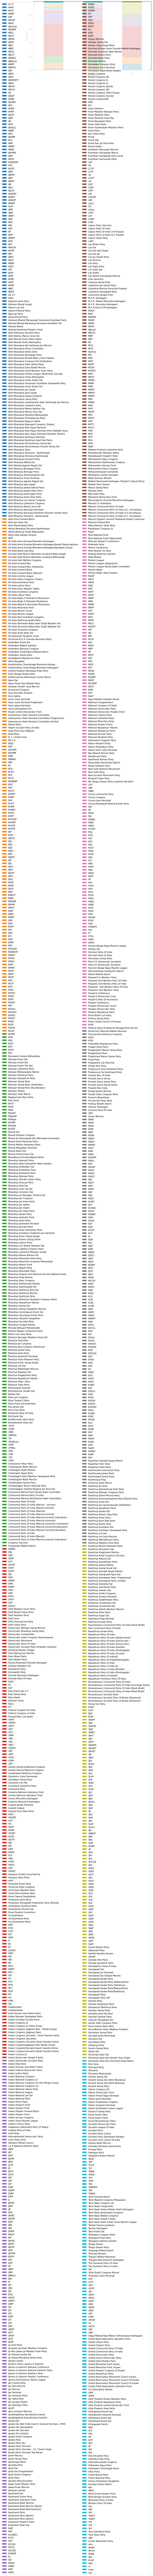

In [13]:
# Stacked Bar Graphs
cross_tab_prop.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("partyname")
plt.ylabel("cand_sex")
plt.show()

To check variation between two categorical variable we used staked bar graph .


# Multivariate Analysis 

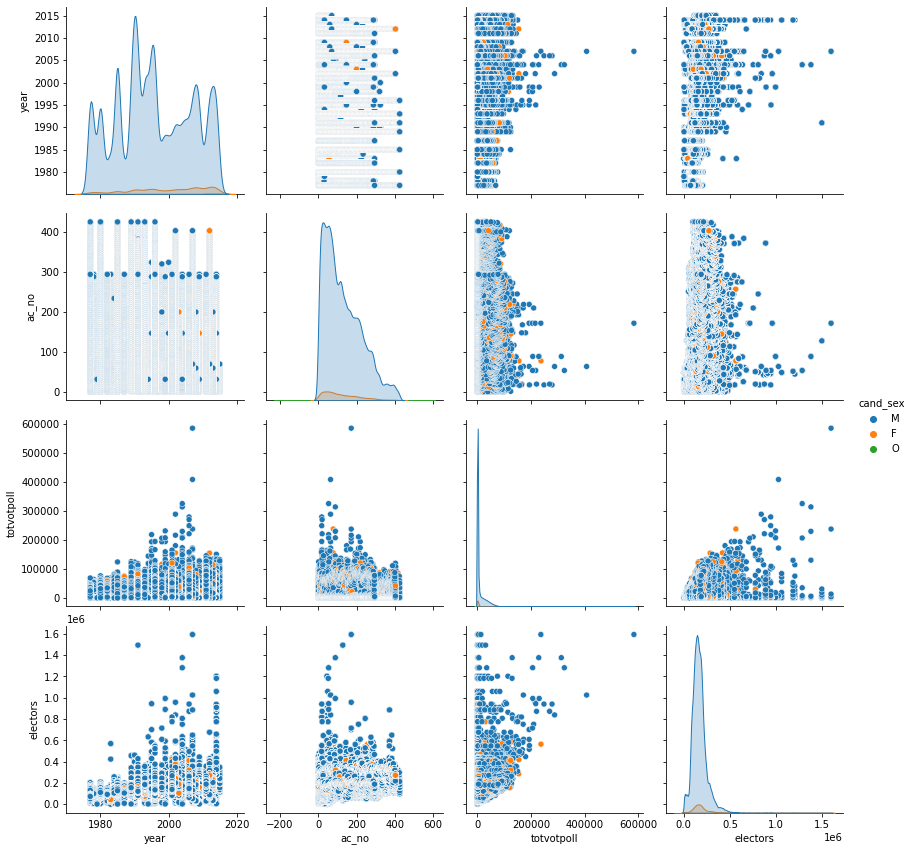

In [14]:
# Pair Plot
sns.pairplot(df,hue="cand_sex",size=3)

here we can see both distribution of single variables and relationships between two variables.

# conclusion